# Introduction

# Markov Decision Proceses

In [125]:
%matplotlib inline
from algo_evaluation.mdp.core import *
from algo_evaluation.mdp import core
reload(core)

<module 'algo_evaluation.mdp.core' from '/Users/maestro/schoolspace/bag-of-algorithms/algo_evaluation/mdp/core.pyc'>

## Forest Management

In `"Application of stochastic dynamic programming to optimal fire management of a spatially structured threatened species"`, Possingham provided a theoretical framework for threated speacies fire management. Problem can be modelled by Markov Decision Process and it is simple enough to be able to understand the optimal policy learning process.

__Fire Management Model__

- States: the age of the threaned species (youngest is 1; experiments performed on various age limits)
- Actions: `Wait` (0) and `Cut` (1)
- p: the probability of wild fire occurence (various ranges used in the experiments)
- Rewards: when the forest is in its oldest state and action 'Wait' is performed, rewards is 4; when the forest is in its oldest state and action 'Cut' is performed, reward is 2

__Value Iteration vs Policy Iteration__

Both algorithms, Value and Policy Iteration converged to the __same__ optimal policy, however the latter converged much faster (less iterations required). 
Value Iteration algorithm solves MDP by iterating through utilities of each state while Policy Iteration alternates between calculating the utilities of states and improving current policy with respect to current utilities.

In [2]:
df = forest_mdp.solve_forest_example()

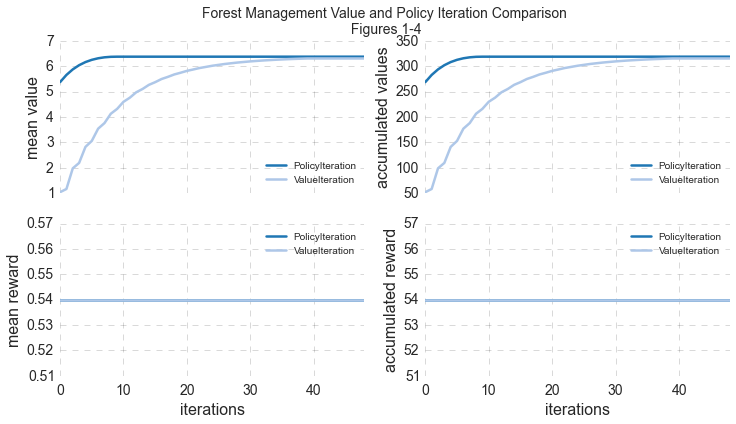

In [3]:
forest_mdp.plot_values_and_rewards(df)

### Factors affecting the convergence rate


- __Age of the forest__ (number of MDP states )

Agent is rewarded with higher values if old forest is preserved and it is evident from the optimal policy choice (see Figure 6). Agent is accumulating more rewards by selecting `wait` action more prominently for forest with age 100 as compared to young forest of 5 years.
According to the current model, accumulation is more rapid for the age below 10, after which ... 

- __Discount factor__

Discount factor is affecting how much of future reward is considered relevant. For discount factors close to 1.0, there is no limit on how much reward can be accumulated (see red curve in Figure 7) which is known as infinite horizon and agent will never terminate. Good trade-off is achieved for discount factor equal to 0.9, where accumulation of reward is saturated with relatively small number of iterations.

- __Probability of fire__

Another important factor to consider is probability of fire which influences the agent's decision to wait or cut the forest. If probability of fire is very small, then it makes sense to preserve the forest, however when the chance of loosing the whole forest in the fire grows, agent is forced to select `Cut` action. In this case, forest can be at least used as a resource (See Figure 8). In the real world probability of fire will be affected by geografical location and weather conditions. In the current model since we do not have additional factors, it makes sense to set probability of fire to 0.5.

Note: it is sufficient to analyze the convergence factors for one of the methods (here ValueIteration is chosen since it took longer to converge and thus the effect is more prominent). Additional advantage of choose ValueIteration over PolicyIteration is algorithm runtime, where former is significantly faster (see Figure 5)

In [332]:
df_age = solve_mdp.test_forest_age()
df_discount = solve_mdp.test_discount_factor()
df_fire_prob = solve_mdp.test_fire_probability()

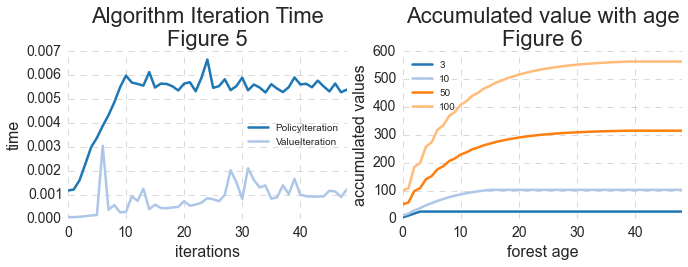

In [333]:
solve_mdp.plot_time_and_states(df, df_age)

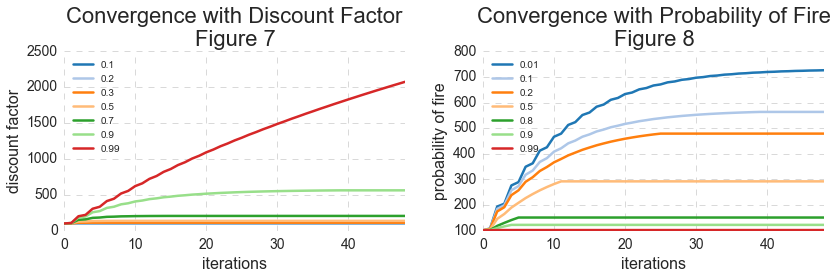

In [334]:
solve_mdp.plot_discount_factor_and_fire_probability(df_discount, df_fire_prob)

__QLearning__

In [336]:
ql = solve_mdp.test_qlearning_algorithm()

In [342]:
ql[0]

,algorithm,age,mean_values,accum_values,mean_rewards,accum_rewards,discount,max_iter,policy,time
0,QLearning,3,29.86547,89.59641,1.166667,7,0.9,10000,"(0, 0, 0)",0.1834569
1,QLearning,10,2.926183,29.26183,0.7,14,0.9,10000,"(0, 1, 1, 0, 1, 0, 0, 1, 0, 0)",0.1584799
2,QLearning,50,0.584628,29.2314,0.54,54,0.9,10000,"(0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, ...",0.1564689
3,QLearning,100,0.2233131,22.33131,0.52,104,0.9,10000,"(0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...",0.162164


In [323]:
# policy matching

BY ITSELF and comparing different algorithms 
CUMULATIVE REWARD PER STEP,
CUMULTAIVE REWARD PER EPISODE,
AVERAGE EPISODE REWARD,
MEDIAN EPISODE REWARD,
CUMULATIVE STEPS PER EPISODE,
STEPS PER EPISODE

The problem can be stated: there are N arms, each having an unknown success probability of emitting a unit reward. The success probabilities of the arms are assumed to be independent of each other. The objective is to pull arms sequentially so as to maximize the total reward.

## Click Through Rate (CTR)

In contrast to the MDP of the fire management where we defined multiple states (forest age) and only two actions (wait or cut), we will define another MDP, where we will have multiple actions and only a single state. This class of markovian processes have a special name - Multiarmed Bandit and are very useful in ad tech business.

__CTR Model__

- states - there is only one assumed state in this process.

- actions - each unique ad is represented by an action (an arm in Multiarmed Bandit jargon);
when user visit the site, one ad will be selected to show according to the learned policy.

For example, we might have a collection of ads `[AutoAd, EntertainmentAd, ShoppingAd, FoodAd,..]` and the learning agent decides which one to show to achieve the best performance metric overall (in the case CTR).

- rewards - each time user is shown an ad, there is a probability that he will click on it.
Every time when click is registered, we accumulate reward of 1 unit and 0 otherwise.

For the purpose of evaluating various algorithms, we will simulate user behavior using __Monte Carlo__ framework - applying random number generator to simulate what might happen in real-time scenarios.

__Click Simulator__

- let's assume we have 20 ads to select from
- let's model the probability of ad resulting in user click by __Poisson__ distribution;

In other words, there will be very few ads resulting in either high or low _clickability_ while the majority of ads will will fall under 50/50 chance.

- let's simulate user by __Bernoulli__ process:
    * reward=1 - user clicks on the ad
    * reward=0 - user ignores the ad

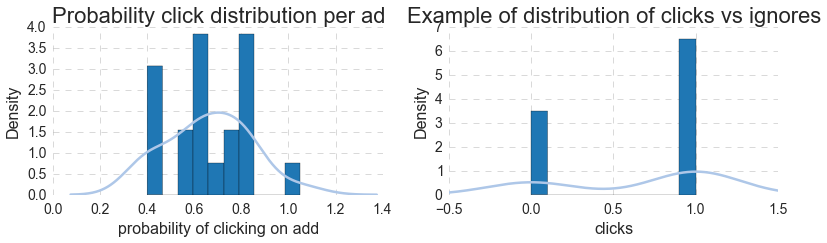

In [177]:
click_model = ctr_mdp.simulate_user_click(mu=14, n_ads=20.0)

In [176]:
reload(core)

<module 'algo_evaluation.mdp.core' from '/Users/maestro/schoolspace/bag-of-algorithms/algo_evaluation/mdp/core.pyc'>

In [82]:
R

array([[ 0.91590393,  0.62728604,  0.28204191,  0.49105308,  0.42259593,
         0.31164696,  0.59288145,  0.34456377,  0.85366559,  0.07588232]])

In [94]:
np.ones((10,1,1))

array([[[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]]])

In [74]:
P

array([[[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]],

       [[ 1.]]])

In [17]:
from mdptoolbox.mdp import ValueIteration

In [83]:
vi = ValueIteration(P, R, discount=1.0)
vi.setVerbose()

In [84]:
vi.run()

  Iteration		V-variation
    1		  0.0
Iterating stopped, epsilon-optimal policy found.


In [85]:
vi.V

(0.9159039312538143,)

In [86]:
vi.policy

(0,)

# Simulations

## Value Iteration

## Policy Iteration

## Softmax

# Comparison

# References

- [Possingham1997] Possingham H & Tuck G, 1997, ‘Application of stochastic dynamic programming to optimal fire management of a spatially structured threatened species’, *MODSIM 1997*, vol. 2, pp. 813–817. `Available online http://www.mssanz.org.au/MODSIM97/Vol%202/Possingham.pdf`

- Markov Decision Process (MDP) Toolbox for Python `http://pymdptoolbox.readthedocs.org/en/stable`